In [37]:
from panelpy import *
import dtumathtools
from mpl_toolkits.mplot3d import axes3d

start_date = "2024-04-20"
end_date = "2024-04-20"
delta_time = "Min"  # "Min", "H",

# Definition of Location object. Using the latitude and altitude entered by the user
site = Location(
    55.785469, 0.0, altitude=21
)  # latitude, longitude, altitude

# We now compute the average yearly energy production for each panel angle between 0 and 90.
# We can then get the angle that procuces the most energy.

angle = []
angle2 = []
energy = []
progress = 0

# We are first computing the energy production of a non bissextile year:

# Definition of the time range of simulation for 365 days
times = pd.date_range(
    start_date + " 00:00:00", end_date + " 23:59:00", freq=delta_time
)
# Retreiving all the sun's position over the time range
sunpos = site.get_solarposition(times)

# Calculation of the 365 days energy production:
for azimuth in [180]:
    for alpha in range(0,90):
        angle2.append(azimuth)
        angle.append(alpha)
        energy.append(flux_function(azimuth, alpha, 0.5, 1, 1, sunpos)/60)
indexi = np.argmax(energy)

41 186 1321.6433006530488


"\nfig, ax = plt.subplots()\nax.plot(angle, energy)\n\nax.set(xlabel='angle (degrees)', ylabel='Energy (kWh)',\n       title='Energy Production for angles \n 20/12/2024')\n\nplt.show()\n"

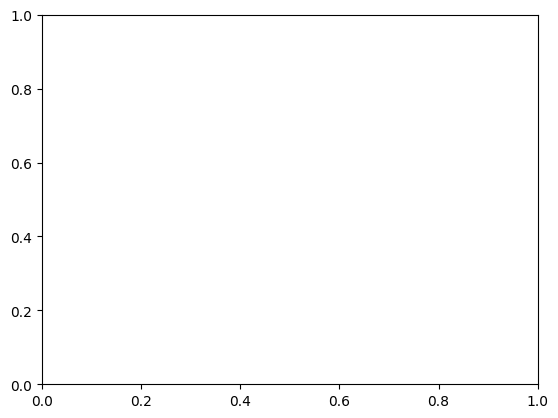

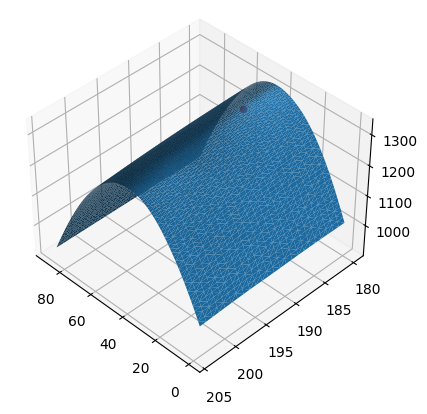

In [23]:
from mpl_toolkits.mplot3d import axes3d

print(angle[indexi],angle2[indexi],energy[indexi])
fig, ax = plt.subplots()
ax = plt.figure().add_subplot(projection='3d')
# Plot the 3D surface
ax.plot_trisurf(np.array(angle),np.array(angle2), np.array(energy))
ax.scatter(angle[indexi],angle2[indexi],energy[indexi],marker = "o",c="red",alpha = 1)
ax.view_init(40, 135, 0)



"""

"""

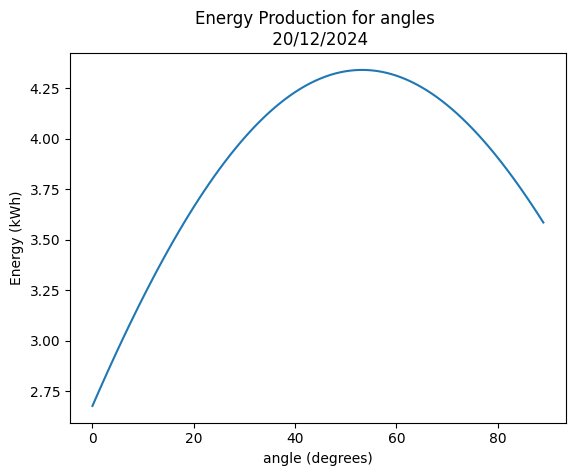

In [39]:
fig, ax = plt.subplots()
ax.plot(angle, energy)
ax.set(xlabel='angle (degrees)', ylabel='Energy (kWh)',
       title='Energy Production for angles \n 20/12/2024')

plt.show()